## Machine Learning - Linear Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

### Reading the dataset and saving it as a dataframe

In [8]:
df = pd.read_csv(r"C:\Users\gmraj\Documents\Refactored_Py_DS_ML_Bootcamp-master\11-Linear-Regression\USA_Housing.csv")

### Exploratory Data Analysis

In [12]:
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [16]:
df.corr(numeric_only=True)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


#### Lets look at the overall distribution of the house prices

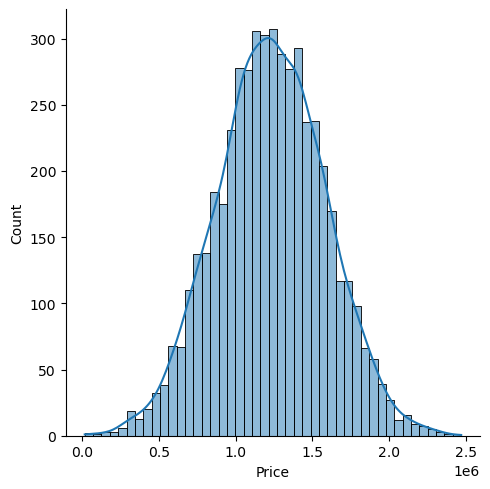

In [19]:
sns.displot(x='Price',data=df,kde=True)
plt.show()

#### Lets look at the correlation between the Avg Number of Bedrooms and Price

In [22]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

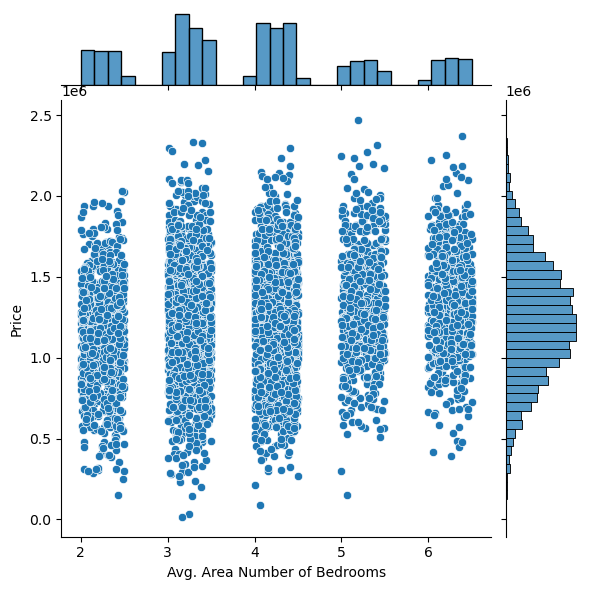

In [37]:
sns.jointplot(x='Avg. Area Number of Bedrooms',y='Price',data=df,palette='Set2')
plt.show()

#### Lets look at the correlation between the Area Population and the house Prices

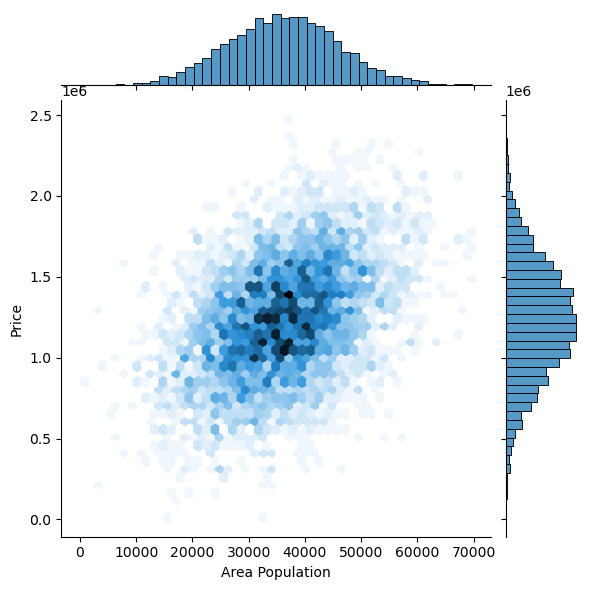

In [39]:
sns.jointplot(x='Area Population',y='Price',data=df,kind='hex')
plt.show()

#### Lets create a heatmap to observe the overall correlation of all the numerical features of this dataset

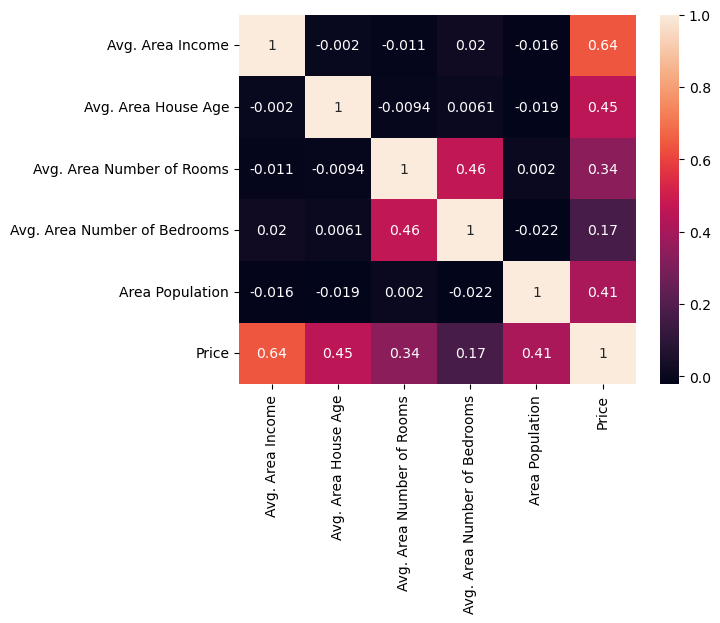

In [42]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

### Lets Train the Model using SK-Learn 

In [45]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [51]:
y = df['Price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [59]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [63]:
lm.fit(X_train,y_train)

LinearRegression()

In [65]:
print(lm.intercept_)

-2647617.072302053


In [67]:
lm.coef_

array([2.16426796e+01, 1.65227890e+05, 1.21886319e+05, 1.44672540e+03,
       1.52409213e+01])

In [69]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Area Income,21.642680
Avg. Area House Age,165227.889797
Avg. Area Number of Rooms,121886.318611
Avg. Area Number of Bedrooms,1446.725402
Area Population,15.240921


### Predictions

#### Linear Regression Models use three metrics to assess the model performance MAE, MSE, and RMSE

In [76]:
predictions = lm.predict(X_test)

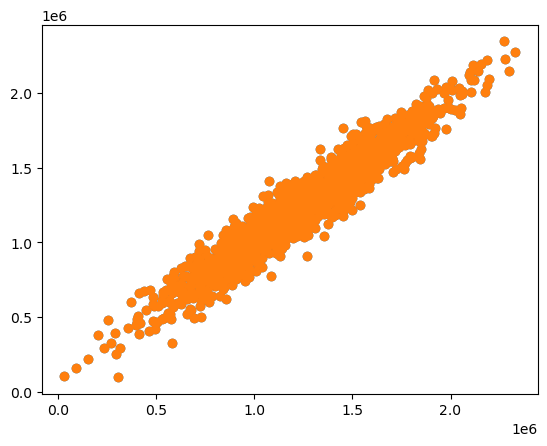

In [80]:
plt.scatter(y_test,predictions)
plt.show()

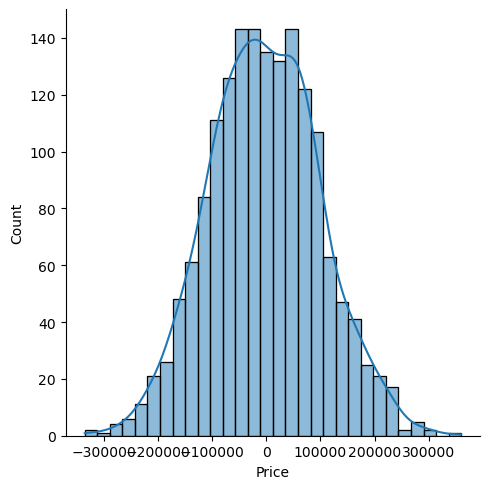

In [86]:
sns.displot((y_test-predictions),kde=True)
plt.show()

In [88]:
from sklearn import metrics

In [110]:
mae = round(metrics.mean_absolute_error(y_test,predictions),0)

In [114]:
mse = round(metrics.mean_squared_error(y_test,predictions),0)

In [116]:
rmse = round(metrics.root_mean_squared_error(y_test,predictions),0)

In [153]:
print('MAE value is ${0}'.format(mae))

MAE value is $81779.0


In [132]:
print('MSE value is ${0}'.format(mse))

MSE value is $10331657031.0


In [136]:
print('RMSE value is ${0}'.format(rmse))

RMSE value is $101645.0


## Thank You